# **Netflix Data Analysis**
## Source: https://www.kaggle.com/datasets/shivamb/netflix-shows
### *Note: Data as of 2021*

In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#Imports
import numpy as np
import pandas as pd

#For Graphs
import seaborn as sns
from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib inline

#Show plotly graphs inline
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.graph_objs as go 

#Import mlb from scikit-learn
from sklearn.preprocessing import MultiLabelBinarizer

import warnings
warnings.filterwarnings("ignore")

## `SOURCE DATA`

In [4]:
#Read data from CSV file
nf = pd.read_csv('netflix_titles.csv')
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## `DATA CLEANING AND DATA TRANSFORMATION`

### `1. Missing Data`

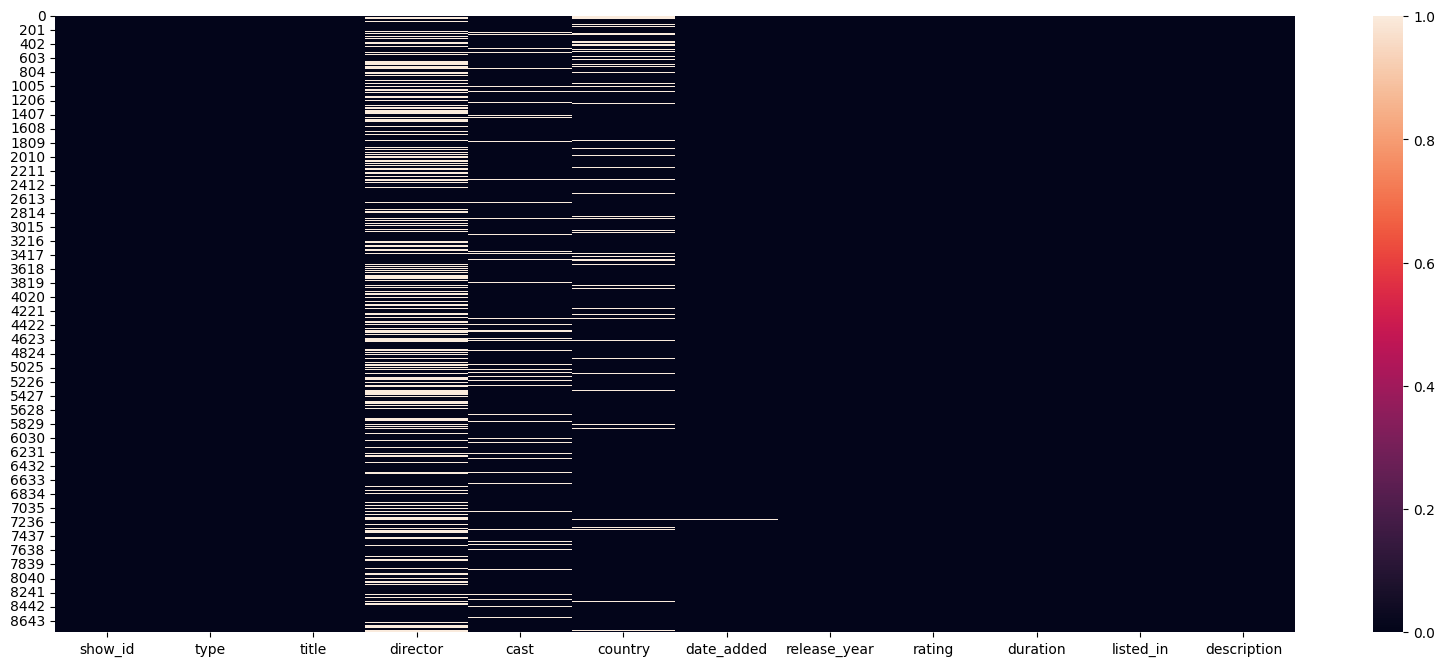

In [5]:
plt.figure(figsize=(20, 8))
sns.heatmap(nf.isnull())
plt.show()

In [6]:
### ⚠️     Notice
#### * Large amount of director and cast are missing
#### * Country has some data missing
#### * Small portion of year-added is missing

### 👉    Action(s)
#### 1. Drop director, cast columns
#### 2. Drop description because of the complex content to analyze
#### 3. Fill missing country with US
#### 4. Drop all other missing data because of small impacts

In [7]:
nf.drop(['director', 'cast', 'description'], axis=1, inplace=True)

# Filling all the missing values in the 'country' column with United States 
#as Netflix was created in the USA and every show is aired on Netflix US.
nf['country'].replace(np.nan, 'United States', inplace=True)

# Dropna to drop all other missing data as it conly accounts for 0.1% of the dataset
nf.dropna(inplace=True)

In [8]:
#Double check missing data table
# nf.isnull().sum()/len(nf)*100
# nf

### `2. Data Types`

### `2.1. Year Released/Added`

In [9]:
# nf[['date_added', 'release_year']]

### 👉    Action(s):
#### 1. Extract year info in date_added
#### 2. Change release_year to year_release for name consistency

In [10]:
#Create new columns with year added
format_string = "%B %d, %Y"
nf['date_added'] = pd.to_datetime(nf['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
nf['year_added'] = nf['date_added'].dt.year.dropna().apply(lambda x : int(x))

#Change release_year to numeric data
nf['year_release'] = nf['release_year'].dropna().apply(lambda x : int(x))

# nf[['year_added', 'year_release']]

In [11]:
#Drop 'date_added' and 'release_year' because we got altervatives
nf.drop(['date_added','release_year'], axis=1, inplace=True)

### `2.2. Duration`

In [12]:
#Function to count the number of contents having "minutes" as duration 
#1: min
#0: seasons
def count(duration):
    x = 0
    if 'min' in duration:
        x += 1
    return x

dur = nf['duration'].dropna().apply(lambda x: count(x))
# nf['duration'].dropna()

### 👉 Action(s)
#### 1. Add column 'season'
#### 2. Classify 'duration' into 2 columns: duration (minutes) and season(s)

In [13]:
nf['season'] = nf['duration'].dropna().apply(lambda x: x[:2] if ('Season' in x or 'Seasons' in x) else 0)

#Return only number of minutes / "0" if it contains season in duration
nf['duration'] = nf['duration'].dropna().apply(lambda x: x[:-4] if 'min' in x else 0)

#Change duration from object to int
#0 min --> 1969 has at least 1 season
nf['duration'] = pd.to_numeric(nf['duration'])

#Change season int
#0 season --> 4265 contents have 1 episode
nf['season'] = pd.to_numeric(nf['season'])

# nf[['duration', 'season']]

### `Data After Cleaning and Transformation`

In [14]:
nf

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,season
0,s1,Movie,Dick Johnson Is Dead,United States,PG-13,90,Documentaries,2021,2020,0
1,s2,TV Show,Blood & Water,South Africa,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries",2021,2021,2
2,s3,TV Show,Ganglands,United States,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",2021,2021,1
3,s4,TV Show,Jailbirds New Orleans,United States,TV-MA,0,"Docuseries, Reality TV",2021,2021,1
4,s5,TV Show,Kota Factory,India,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",2021,2021,2
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,R,158,"Cult Movies, Dramas, Thrillers",2019,2007,0
8803,s8804,TV Show,Zombie Dumb,United States,TV-Y7,0,"Kids' TV, Korean TV Shows, TV Comedies",2019,2018,2
8804,s8805,Movie,Zombieland,United States,R,88,"Comedies, Horror Movies",2019,2009,0
8805,s8806,Movie,Zoom,United States,PG,88,"Children & Family Movies, Comedies",2020,2006,0


## `EXPLORATORY DATA ANALYSIS`

### `1. Movies and TV shows Across Countries`

### `1.1. Distribution of Contents and Top 10 Countries`

In [15]:
#### Notice:
##### * Some are combination of many countries

from collections import Counter
country_data = nf['country']

#Split the input due to lists of many countries
country = ','.join(country_data).replace(' ,',',').replace(', ',',').split(',')

count = Counter(country)
#count
country_count = pd.Series(dict(count)).sort_values(ascending=False)

#TOP 10 Countries
top10_country = country_count.head(10)
# top10_country
# nf['country'].values

In [ ]:
fig = plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 16})
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 10])

# Chart of Distribution of 2 Types
axes1 = plt.subplot(gs[0])
patches, texts, autotexts  = plt.pie(x=nf['type'].value_counts(), labels=nf['type'].value_counts().index, 
        colors=sns.color_palette("crest", n_colors=2), autopct = '%1.2f%%')
axes1.axis('equal')
plt.title('Distribution of Movies and TV Shows', fontweight='bold', y=-0.15)

# Top 10 Countries with most contents
axes2 = plt.subplot(gs[1])
patches1, texts1, autotexts1 = axes2.pie(top10_country, labels=top10_country.index, 
          colors=sns.color_palette("Spectral", n_colors=10), autopct='%1.2f%%')
axes2.axis('equal')
plt.title('Top 10 Countries with Most Content', fontweight='bold', y=-0.15)

# Set autotext label properties
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(17)
    
plt.show()

### `1.2. Top 10 Countries: Comparison between Movie and TV Shows`

In [ ]:
#Concatenate dataframes of top 10 countries from original dataset into a new data frame called top_10
top_10=nf[(nf['country']=='United States')|(nf['country']=='India')|(nf['country']=='United Kingdom')|
          (nf['country']=='Japan')|(nf['country']=='Canada')|(nf['country']=='Spain')|(nf['country']=='France')|
          (nf['country']=='South Korea')|(nf['country']=='Germany')|(nf['country']=='Mexico')]
# top_10.head()

In [ ]:
#Graph showing the distribution of Movies and Tv Shows in each country of top 10, then the comparison
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.countplot(x='country',hue='type',data=top_10, order=top10_country.index, palette="crest")
plt.title('Comparison between Movies and TV Shows Across Top 10 Countries', fontweight='bold', y=1.05)
plt.show()

In [ ]:
#### Notice:
##### * Number of movies is about 2 times number of TV shows in US, Canada, France, Spain, Germany, and Mexico
##### * Number of movies is about 8 times number of TV shows in India and approximately the same in UK
##### * It reverses in Japan and South Korea: Number of movies is about 1/3-1/2 number of TV shows
##### * Need to consider the lists of many countries


### 

### `2. Relationship between Contents Released Years vs. Added Years  `

In [ ]:
#Create 2 new DF to seperate TV Shows and Movies
df_show =  nf[nf['type']=='TV Show']
df_movie =  nf[nf['type']=='Movie']

#Create df for the above information
# nf_content_added = nf['year_added'].value_counts().reset_index().rename(columns={'index':'year_added', 'year_added':'count'})
# nf_content_released = nf['year_release'].value_counts().reset_index().rename(columns={'index':'year_release', 'year_release':'count'})

#Add percent column to get better view of how much the year accounts for
# nf_content_added = nf_content_added.sort_values('year_added')
# nf_content['percent'] = nf_content['count'].apply(lambda x : 100*x/sum(nf_content['count']))
# nf_content

def contents_count(df):
    # Create a list of unique years from 'year_added' and 'year_release'
    unique_years = sorted(set(df['year_added']).union(set(df['year_release'])))

    # Initialize empty lists for counts of 'year_added' and 'year_release'
    add_counts = []
    release_counts = []
    years = []

    # Iterate through the unique years
    for year in unique_years:
        if year >= 2013: 
            years.append(year)
            add_count = df[df['year_added'] == year]['year_added'].count()
            release_count = df[df['year_release'] == year]['year_release'].count()
            add_counts.append(add_count)
            release_counts.append(release_count)

    # Create a dataframe with the collected data
    df_counts = pd.DataFrame({'year': years, 'add_count': add_counts, 'release_count': release_counts})
    return df_counts

movie_counts = contents_count(df_movie)
show_counts = contents_count(df_show)

In [ ]:
#Create interactive graph to visualize number of contents added/released over years
p1 = go.Scatter(x=movie_counts['year'], y=movie_counts["add_count"], name="Movies Added", marker=dict(color="#a678de"))
p2 = go.Scatter(x=show_counts['year'], y=show_counts["add_count"], name="TV Shows Added", marker=dict(color="#6ad49b"))
p3 = go.Scatter(x=movie_counts['year'], y=movie_counts["release_count"], name="Movies Released", marker=dict(color="#a678de"), line=dict(dash='dash'))
p4 = go.Scatter(x=show_counts['year'], y=show_counts["release_count"], name="TV Shows Released", marker=dict(color="#6ad49b"), line=dict(dash='dash'))

layout = go.Layout(title="<b>Contents Released vs. Added to Netflix from 2013 to 2021", title_x=0.5,
                   font=dict(family="Arial",size=14, color='black'),
                   legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data=[p1,p3,p2,p4], layout=layout)

fig.update_layout(
    height=600,
    font=dict(
        size=15
    )
)
fig.show()

In [ ]:
### ⚠️ Notice
#### * The growth in content started from 2013
#### * The growth in number of movies is much higher than that of TV shows on Netflix --> Netflix is focusing on Movies
#### * More than 1200 new movies were added in both 2018 and 2019
#### * Decreasing is seen in 2020 and after that 


In [ ]:
#### Notice:
##### * The highest increase in producing movies is in 2017, and in 2020 for TV shows
##### * It looks like the trend of contents released and added are similar --> Netflix added new contents

### 

### `3. Availability of Content for Different Age Groups: Kids, Teenagers, Adults`

In [ ]:
# Understanding Netflix rating based on ages
ages = {'TV-PG': 'Kids',
        'TV-MA': 'Adults',
        'TV-Y7-FV': 'Kids',
        'TV-Y7': 'Kids',
        'TV-14': 'Teens',
        'R': 'Adults',
        'TV-Y': 'Kids',
        'NR': 'Adults',
        'PG-13': 'Teens',
        'TV-G': 'Kids',
        'PG': 'Kids',
        'G': 'Kids',
        'UR': 'Adults',
        'NC-17': 'Adults'
}

In [ ]:
#Replace the existed rating with an easier term as in the list
nf['ages'] = nf['rating'].replace(ages)
# nf['ages']

In [ ]:
# Group nf['rating'] and ['ages'], count number of show_id(s) in them
rating_nf = nf.groupby(['rating', 'ages']).agg({'show_id': 'count'}).reset_index()

# Change column's name
rating_nf.columns = ['rating', 'ages', 'counts']

# Group data by ages
rating_nf = rating_nf.sort_values('ages')
# rating_nf

In [ ]:
#List of Netflix ratings
group_ages = ["G", "TV-G", "TV-Y", "PG", "TV-PG", "TV-Y7", "TV-Y7-FV",
              "PG-13", "TV-14", 'NC-17', "NR", "R", "TV-MA", "UR"]
age_order = {'Kids':0, 'Teens':1, 'Adults':2}

In [ ]:
#Graph showing the distribution of Netflix ratings which are colored by normal terms
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.barplot(x='rating', y='counts', data=rating_nf, hue='ages', order=group_ages,
            hue_order=['Kids', 'Teens', 'Adults'], 
            palette="rocket_r", dodge=False)
plt.title("Content Ratings Distribution Across Different Age Groups", fontweight='bold', y=1.05)

In [ ]:
#### Notice:
##### * Most of shows are for teens and adults, small portions are for kids.
#### Question: How about each type of contents?

In [ ]:
#Recreat 2 dfs with updated ages column
nf_tv =  nf[nf['type']=='TV Show']
nf_movie =  nf[nf['type']=='Movie']
# nf_movie.head()

In [ ]:
#DF of movie rating with different ages and count
movie_rating = nf_movie.groupby(['ages']).agg({'show_id': 'count'}).reset_index()
movie_rating.columns = ['ages', 'count']
movie_rating = movie_rating.sort_values(by=['ages'], key=lambda x: x.map(age_order))
# movie_rating

In [ ]:
#DF of TV Shows rating with different ages and count
tv_rating = nf_tv.groupby(['ages']).agg({'show_id': 'count'}).reset_index()
tv_rating.columns = ['ages', 'count']
tv_rating = tv_rating.sort_values(by=['ages'], key=lambda x: x.map(age_order))
# tv_rating

In [ ]:
#Graph showing distribution of ages in each type, then comparison
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,8))
plt.rcParams.update({'font.size': 13})
    
data = [movie_rating, tv_rating]
titles = ['Distribution of Movies Rating', 'Distribution of TV Shows Rating']

# Loop through the data and titles to create pie charts
for i, (df, title) in enumerate(zip(data, titles)):
    patches, texts, autotexts = axes[i].pie(x=df['count'], labels=df['ages'],
                                            autopct='%1.2f%%', colors=sns.color_palette("rocket_r", n_colors=3))
    axes[i].set_title(title, fontweight="bold", y=-0.03)
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(15)

In [ ]:
### ⚠️ Notice
#### * Both pies show largest amount of content for Adults
#### * More of TV shows are added for kids than movies.

### 

### `4. Correlation between Age Groups and Duration/Length of Contents`


In [ ]:
#DF of duration in min
duration_movie = nf[nf['duration'] != 0]
# duration_movie.head(2)

In [ ]:
##### Notice: 
# * All movies have duration in minutes 
# * All TV shows have duration in season(s)

# duration_movie[duration_movie["season"] == 1].info()

In [ ]:
#Graph showing distribution of length of movie, distinguished by the normal ages
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.histplot(x='duration', data=duration_movie, bins=30, 
             hue='ages', hue_order=['Kids', 'Teens', 'Adults'], 
             palette="magma_r")
plt.title('Distribution of Duration (in Minutes) of Movies',fontweight="bold", y=1.05)
plt.show()

In [ ]:
### ⚠️ Notice
#### * Most of movies are in range from 80 min to 2 hours. These movies are mostly for adults.
#### * Longer movies are made for teenagers and kids.

In [ ]:
duration_tv = nf[nf['season'] != 0]
# nf[nf['season'] != 0]

In [ ]:
#Graph showing distribution of length of movie, distinguished by the normal ages
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.countplot(x='season', data=duration_tv, hue='ages', hue_order=['Kids', 'Teens', 'Adults'], palette="rocket_r")
plt.title('Distribution of Duration (in Season) of TV Shows',fontweight="bold", y=1.05)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#### Notice:
##### * Most of TV shows have 1 season. The amount decreases in longer seasons (from 8 to 17).
##### * The distribution of length of TV shows is approximatly the same for teens and kids.
##### * Short TV shows for adults take a large amount ammong 3 groups.

### `5. Genre of Different Types of Movies and TV Shows`

In [ ]:
mlb = MultiLabelBinarizer()

In [ ]:
#Fuction to find number of different kinds("listed_in") of each content(movies/TV Shows)
def count(nf, content):
    #Split the list in original content
    nf['genre'] = nf['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

    #nf['genre'] contains lists --> loop through to get number of unique 
    kinds = []
    for i in nf['genre']: 
        kinds += i
    kinds = set(kinds)
    
    return "There are {} types in the Netflix {} Dataset".format(len(kinds),content)   

In [ ]:
#Fuction for relation heatmap showing the relationship between different kinds
def relation_heatmap(nf, content, cmap_color):
    #Fit the label sets binarizer and transform the given label sets.
    x = mlb.fit_transform(nf['genre'])
    
    #A copy of the classes parameter when provided
    y = mlb.classes_
    
    #Create new df for correlation
    df = pd.DataFrame(x, columns=y, index=nf['genre'].index)
    corr = df.corr()
    
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.set(font_scale=1)
    pl = sns.heatmap(corr, mask = mask, cmap= cmap_color, vmin=-.5, vmax=.5,square=True, linewidths=.7)
    plt.title(content + " Genre", fontweight='bold', y=1.05)
    plt.show()

In [ ]:
count(nf_movie, 'Movie')

In [ ]:
relation_heatmap(nf_movie, 'Movie', "viridis")

In [ ]:
#### Notice:
##### * There is negative relationship between drama and documentary.
##### * Many Sci-Fi & Fantasy movies are in Action & Adventure
##### * Positive relationship between Horror Movies and Thrillers

In [ ]:
count(nf_tv, 'TV Show')

In [ ]:
relation_heatmap(nf_tv, 'TV Show', "viridis")

In [ ]:
#### Notice:
##### * Negative relationship between Kids' TV and International TV shows, but good amount of International TV shows are Romatic TV shows or TV Dramas
##### * There are many Documentaries for Science and Nature TV.
##### * There's positive correlation between TV Horror and TV Mysteries

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
# plt.rcParams.update({'font.size': 18})
fig.subplots_adjust(wspace=0.2)  # Adjust horizontal spacing between subplots

# List of dataframes
dataframes = [nf_movie, nf_tv]
titles = ["Top 10 Genre in Movies", "Top 10 Genre in TV Shows"]

# Iterate through dataframes and axes
for ax, df, title in zip(axes, dataframes, titles):
    sns.set(font_scale=1.5)
    sns.barplot(ax=ax,
                x=df["listed_in"].value_counts().head(10).index,
                y=df["listed_in"].value_counts().head(10).values, palette="viridis")
    ax.set_title(title, fontweight='bold', y=1.05)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate and align x-axis labels

plt.show()

In [ ]:
#### Notice:
##### * Most common movies are in Dramas and International Movies, Documentaries, Stand-Up Comedy
##### * Most of TV shows are Kids' TV, International TV Shows, and TV Dramas